<a href="https://colab.research.google.com/github/Dracomp89/Eduardo-Phillips---202115611/blob/main/Complementaria_09_EP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Complementaria métodos computacionales 1
>
> Semana 09

***

# 1) Descenso gradiente (4pt)

Dado un set de datos (dos arrays 1-d) `x` y `y`, y una función definida como `f(x,alpha)`, implemente una función que encuentre, mediante descenso gradiente, el vector de parámetros `alpha` que minimice la suma de cuadrados de los errores de `y` con la función de modelo `f(x,alpha)`. Es decir,

$$
\min_{\vec{\alpha}} \sum_{i=1}^N \left(y_i - f(x_i,\vec{\alpha})\right)^2
$$

La función debe tener la siguiente signatura:

```python
def gradient_descent_least_squares(model_function, x_data, y_data, initial_parameters, learning_rate):
```


Para probar su algoritmo, invéntese alguna función no lineal (por ejemplo $\alpha_1 e^{-\alpha_1 x} \sin(\alpha_2 x)$, o algo así), genere datos de prueba, y agrégueles ruido, e intente encontrar los parámetros con los cuales generó los datos.

También hay un ejemplo de datos en bloque neón. Intente encontrar la función a la cual corresponden esos datos.


In [31]:
import numpy as np


def model_function(x, alpha):
    return alpha[0] * np.exp(-alpha[1] * x) * np.sin(alpha[2] * x)


def gradient_descent_least_squares(model_function, x_data, y_data, initial_parameters, learning_rate, max_iterations=1000, tolerance=1e-6):
    alpha = np.array(initial_parameters, dtype=np.float64)
    N = len(y_data)

    for iteration in range(max_iterations):

        predictions = model_function(x_data, alpha)


        error = predictions - y_data


        grad = np.zeros_like(alpha)
        for i in range(len(alpha)):

            alpha_step = np.copy(alpha)
            alpha_step[i] += 1e-5
            grad[i] = (np.sum((model_function(x_data, alpha_step) - y_data)**2) - np.sum((predictions - y_data)**2)) / 1e-5


        alpha -= learning_rate * grad


        mse = np.mean(error**2)
        if mse < tolerance:
            print(f"Convergió en {iteration} iteraciones.")
            break

    return alpha


file_path = '/content/datos_ejemplo_ajuste.dat'
data = np.loadtxt(file_path)


x_data, y_data = data[:, 0], data[:, 1]


initial_parameters = [1, 1, 1]
learning_rate = 0.01


alpha_optimized = gradient_descent_least_squares(model_function, x_data, y_data, initial_parameters, learning_rate)

print("Parámetros optimizados:", alpha_optimized)


Parámetros optimizados: [-5.53645013  2.07226604 -7.45472829]


# 2) Comodidades


## 2.a) Vectorización (1pt)

Haga que el parámetro de condiciones iniciales esté vectorizado, es decir, que cuando sea una lista de parámetros, retorne una lista de resultados del método empezando desde cada especificación de parámetros iniciales.

No recomiendo usar `np.vectorize`, pues aunque es posible, es complicado usarlo en este caso.

## 2.b) Descenso estocástico (1pt)

agregue un parámetro a la función `train_test_divide=False`, que cuando sea un número diferente de cero, realice cada paso del descenso gradiente con una selección aleatoria de los datos `x` y `y`.

Por ejemplo, si `train_test_divide=0.35`, cada paso se debe realizar seleccionando al azar el 35% de las parejas (x,y).

In [30]:
import numpy as np


def model_function(x, alpha):
    return alpha[0] * np.exp(-alpha[1] * x) * np.sin(alpha[2] * x)


def gradient_descent_least_squares(model_function, x_data, y_data, initial_parameters, learning_rate, max_iterations=1000, tolerance=1e-6, train_test_divide=False):
    if isinstance(initial_parameters[0], list) or isinstance(initial_parameters[0], np.ndarray):

        results = [gradient_descent_least_squares(model_function, x_data, y_data, params, learning_rate, max_iterations, tolerance, train_test_divide) for params in initial_parameters]
        return results

    alpha = np.array(initial_parameters, dtype=np.float64)
    N = len(y_data)

    for iteration in range(max_iterations):
        if train_test_divide:

            indices = np.random.choice(N, int(N * train_test_divide), replace=False)
            x_batch = x_data[indices]
            y_batch = y_data[indices]
        else:
            x_batch = x_data
            y_batch = y_data


        predictions = model_function(x_batch, alpha)


        error = predictions - y_batch


        grad = np.zeros_like(alpha)
        for i in range(len(alpha)):

            alpha_step = np.copy(alpha)
            alpha_step[i] += 1e-5
            grad[i] = (np.sum((model_function(x_batch, alpha_step) - y_batch)**2) - np.sum((predictions - y_batch)**2)) / 1e-5


        alpha -= learning_rate * grad


        mse = np.mean(error**2)
        if mse < tolerance:
            print(f"Convergió en {iteration} iteraciones.")
            break

    return alpha


file_path = '/content/datos_ejemplo_ajuste.dat'
data = np.loadtxt(file_path)


x_data, y_data = data[:, 0], data[:, 1]


initial_parameters = [[1, 1, 1], [0.5, 1.5, 0.8], [1.2, 0.8, 1.1]]
learning_rate = 0.01


train_test_divide = 0.35

alpha_optimized = gradient_descent_least_squares(model_function, x_data, y_data, initial_parameters, learning_rate, train_test_divide=train_test_divide)

print("Parámetros optimizados:", alpha_optimized)




Parámetros optimizados: [array([5.54998692, 2.07267838, 7.46118599]), array([3.49432131, 0.69023216, 1.00141366]), array([5.55767877, 2.04397559, 7.46371692])]


# 3) bonos

Encuentre una función que describa los datos `datos_09.npz`.

Si usa un polinomio o una serie de Fourier, encuentre el orden "óptimo", investigue qué significa eso.






Forma del archivo .npy: (1903, 2)
Orden 1: MSE = 0.024598536897951696
Orden 2: MSE = 0.006279644312731073
Orden 3: MSE = 0.001424517688745461
Orden 4: MSE = 0.0003803381212038588
Orden 5: MSE = 0.0002135402917192854
Orden 6: MSE = 0.00016092854007290308
Orden 7: MSE = 0.00015086009156121662
Orden 8: MSE = 0.00012984652015660372
Orden 9: MSE = 0.00012428149740890206
Orden 10: MSE = 0.0001251858324864334
El orden óptimo para el polinomio es 9 con un MSE de 0.00012428149740890206
Orden 1: MSE = 0.0013922989611554028
Orden 2: MSE = 0.00020972323448283455
Orden 3: MSE = 0.00014794024305734367
Orden 4: MSE = 0.0001253719166847353
Orden 5: MSE = 0.00012233382047341447
Orden 6: MSE = 0.00010779022812858027
Orden 7: MSE = 0.00010750475579242996
Orden 8: MSE = 0.00010659439151803655
Orden 9: MSE = 0.00010584468547181506
Orden 10: MSE = 0.00010438593081775116
El orden óptimo para la serie de Fourier es 10 con un MSE de 0.00010438593081775116


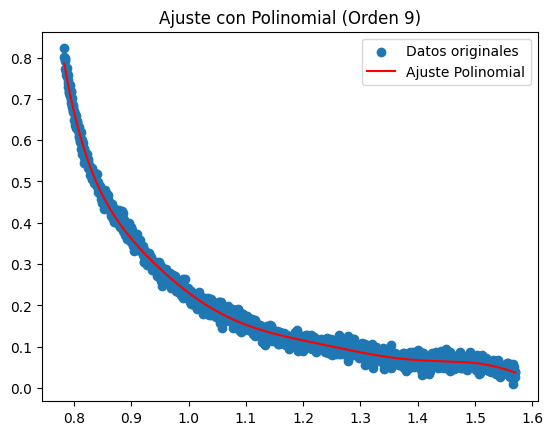

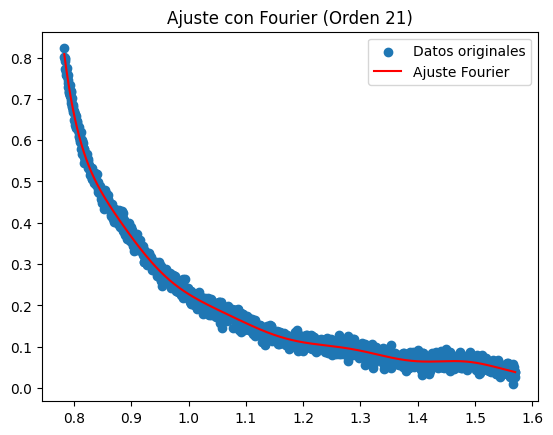

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def load_data(file_path):
    if file_path.endswith('.npz'):
        data = np.load(file_path)
        print("Contenido del archivo .npz:", data.files)
        x_data = data['x']
        y_data = data['y']
    elif file_path.endswith('.npy'):
        data = np.load(file_path)
        print("Forma del archivo .npy:", data.shape)
        x_data = data[:, 0]
        y_data = data[:, 1]
    else:
        raise ValueError("Formato de archivo no soportado. Usa .npy o .npz")

    return x_data, y_data

def polynomial_fit(x, *coeffs):
    """Función polinomial de grado n."""
    return sum(c * x**i for i, c in enumerate(coeffs))

def find_optimal_polynomial_order(x_data, y_data, max_order=10):
    """Encuentra el orden óptimo de un polinomio usando validación cruzada o AIC/BIC."""
    best_order = 0
    best_mse = float('inf')
    train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3)

    for order in range(1, max_order+1):
        popt, _ = curve_fit(lambda x, *params: polynomial_fit(x, *params), train_x, train_y, p0=[1]*order)
        y_pred = polynomial_fit(test_x, *popt)

        mse = mean_squared_error(test_y, y_pred)

        print(f"Orden {order}: MSE = {mse}")

        if mse < best_mse:
            best_mse = mse
            best_order = order

    return best_order, best_mse

def fourier_series(x, *coeffs):
    """Ajuste de serie de Fourier de orden n."""
    a0 = coeffs[0]
    series_sum = a0
    n = (len(coeffs) - 1) // 2
    for i in range(1, n+1):
        series_sum += coeffs[2*i-1] * np.cos(i * x) + coeffs[2*i] * np.sin(i * x)
    return series_sum

def find_optimal_fourier_order(x_data, y_data, max_order=10):
    """Encuentra el orden óptimo de una serie de Fourier usando validación cruzada o AIC/BIC."""
    best_order = 0
    best_mse = float('inf')
    train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3)

    for order in range(1, max_order+1):
        popt, _ = curve_fit(lambda x, *params: fourier_series(x, *params), train_x, train_y, p0=[1]*(2*order+1))
        y_pred = fourier_series(test_x, *popt)

        mse = mean_squared_error(test_y, y_pred)

        print(f"Orden {order}: MSE = {mse}")

        if mse < best_mse:
            best_mse = mse
            best_order = order

    return best_order, best_mse


def plot_results(x_data, y_data, model_func, optimal_order, model_name):
    """Graficar los datos originales y el modelo ajustado."""
    popt, _ = curve_fit(lambda x, *params: model_func(x, *params), x_data, y_data, p0=[1]*optimal_order)

    y_pred = model_func(x_data, *popt)

    plt.scatter(x_data, y_data, label="Datos originales")
    plt.plot(x_data, y_pred, color='red', label=f"Ajuste {model_name}")
    plt.title(f"Ajuste con {model_name} (Orden {optimal_order})")
    plt.legend()
    plt.show()


file_path = '/content/datos_09.npy'

x_data, y_data = load_data(file_path)

optimal_polynomial_order, best_polynomial_mse = find_optimal_polynomial_order(x_data, y_data)
print(f"El orden óptimo para el polinomio es {optimal_polynomial_order} con un MSE de {best_polynomial_mse}")

optimal_fourier_order, best_fourier_mse = find_optimal_fourier_order(x_data, y_data)
print(f"El orden óptimo para la serie de Fourier es {optimal_fourier_order} con un MSE de {best_fourier_mse}")

plot_results(x_data, y_data, polynomial_fit, optimal_polynomial_order, "Polinomial")

plot_results(x_data, y_data, fourier_series, 2 * optimal_fourier_order + 1, "Fourier")

